In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data

metadata.csv	       test   train_masks      zips
sample_submission.csv  train  train_masks.csv


In [3]:
!ls data/train/ | wc -l
!ls data/train_masks | wc -l

5088
5088


In [4]:
!ls data/train/ | grep "0cdf5b5d0ce1"
!ls data/train_masks/ | grep "0cdf5b5d0ce1"

0cdf5b5d0ce1_01.jpg
0cdf5b5d0ce1_02.jpg
0cdf5b5d0ce1_03.jpg
0cdf5b5d0ce1_04.jpg
0cdf5b5d0ce1_05.jpg
0cdf5b5d0ce1_06.jpg
0cdf5b5d0ce1_07.jpg
0cdf5b5d0ce1_08.jpg
0cdf5b5d0ce1_09.jpg
0cdf5b5d0ce1_10.jpg
0cdf5b5d0ce1_11.jpg
0cdf5b5d0ce1_12.jpg
0cdf5b5d0ce1_13.jpg
0cdf5b5d0ce1_14.jpg
0cdf5b5d0ce1_15.jpg
0cdf5b5d0ce1_16.jpg
0cdf5b5d0ce1_01_mask.gif
0cdf5b5d0ce1_02_mask.gif
0cdf5b5d0ce1_03_mask.gif
0cdf5b5d0ce1_04_mask.gif
0cdf5b5d0ce1_05_mask.gif
0cdf5b5d0ce1_06_mask.gif
0cdf5b5d0ce1_07_mask.gif
0cdf5b5d0ce1_08_mask.gif
0cdf5b5d0ce1_09_mask.gif
0cdf5b5d0ce1_10_mask.gif
0cdf5b5d0ce1_11_mask.gif
0cdf5b5d0ce1_12_mask.gif
0cdf5b5d0ce1_13_mask.gif
0cdf5b5d0ce1_14_mask.gif
0cdf5b5d0ce1_15_mask.gif
0cdf5b5d0ce1_16_mask.gif


In [5]:
def get_filename(image_id, image_type):
    check_dir = False
    if "Train" == image_type:
        ext = 'jpg'
        data_path = "data/train/"
        suffix = ''
    elif "Train_mask" in image_type:
        ext = 'gif'
        data_path = "data/train_masks/"
        suffix = '_mask'
    elif "Test" in image_type:
        ext = 'jpg'
        data_path = "data/test"
        suffix = ''
    else:
        raise Exception("Image type '%s' is not recognized" % image_type)

    if check_dir and not os.path.exists(data_path):
        os.makedirs(data_path)

    return os.path.join(data_path, "{}{}.{}".format(image_id, suffix, ext))

get_filename("0cdf5b5d0ce1_01", "Test")

'data/test/0cdf5b5d0ce1_01.jpg'

In [6]:
import cv2
from PIL import Image

# taken from kaggle data analysis kernel 
def get_image_data(image_id, image_type, **kwargs):
    if 'mask' in image_type:
        img = _get_image_data_pil(image_id, image_type, **kwargs)
    else:
        img = _get_image_data_opencv(image_id, image_type, **kwargs)
    return img

def _get_image_data_opencv(image_id, image_type, **kwargs):
    fname = get_filename(image_id, image_type)
    img = cv2.imread(fname)
    assert img is not None, "Failed to read image : %s, %s" % (image_id, image_type)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def _get_image_data_pil(image_id, image_type, return_exif_md=False, return_shape_only=False):
    fname = get_filename(image_id, image_type)
    try:
        img_pil = Image.open(fname)
    except Exception as e:
        assert False, "Failed to read image : %s, %s. Error message: %s" % (image_id, image_type, e)

    if return_shape_only:
        return img_pil.size[::-1] + (len(img_pil.getbands()),)

    img = np.asarray(img_pil)
    print(img.shape)
    assert isinstance(img, np.ndarray), "Open image is not an ndarray. Image id/type : %s, %s" % (image_id, image_type)
    if not return_exif_md:
        return img
    else:
        return img, img_pil._getexif()

(1280, 1918, 3)
(1280, 1918)
(1280, 1918)


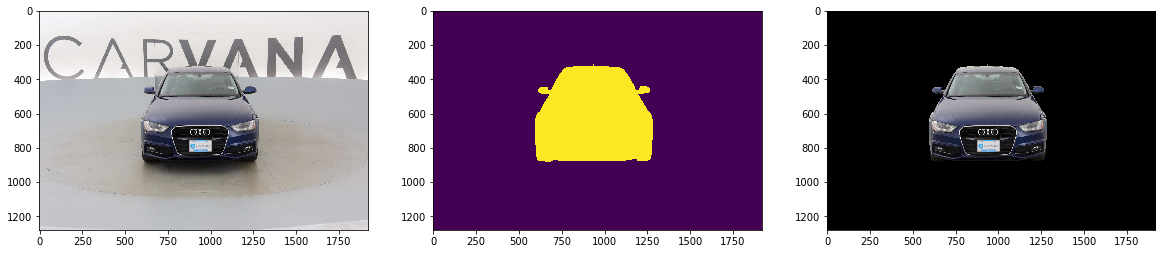

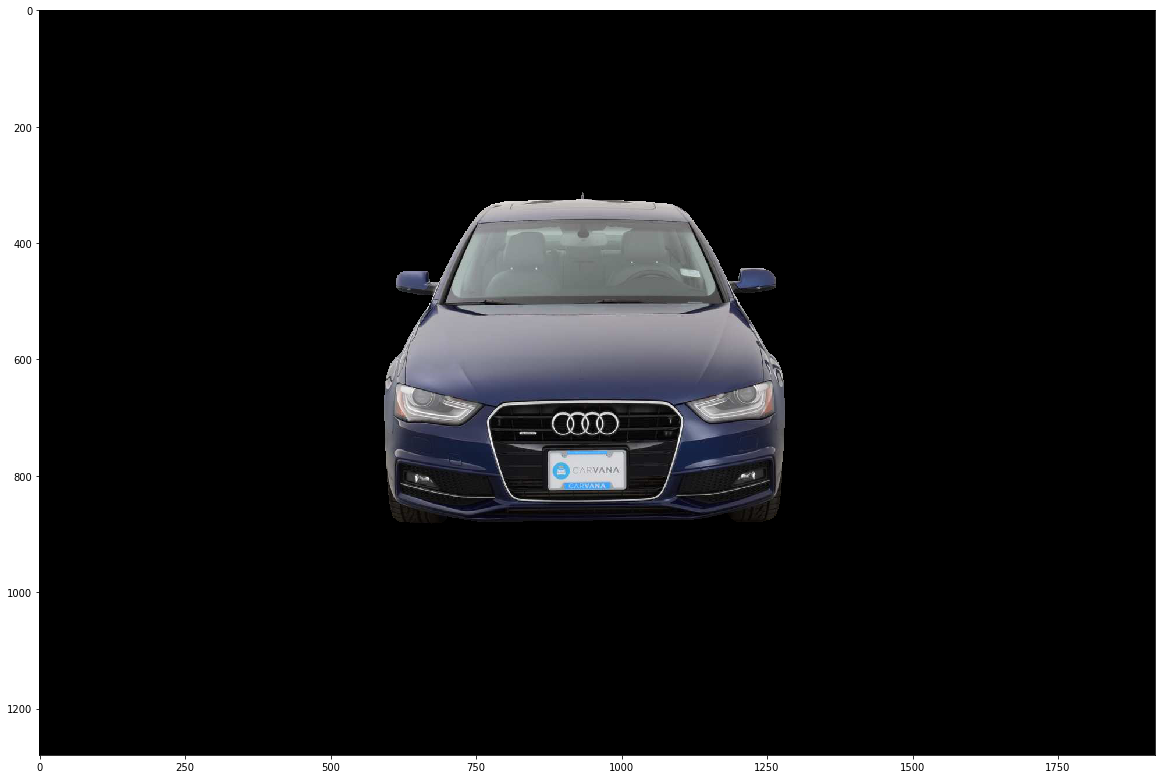

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
img = get_image_data("0cdf5b5d0ce1_01", "Train")
print(img.shape)
plt.imshow(img)

plt.subplot(1, 3, 2)
mask = get_image_data("0cdf5b5d0ce1_01", "Train_mask")
print(mask.shape)
plt.imshow(mask)

plt.subplot(1, 3, 3)
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

# print(masked)
plt.figure(figsize=(20,20))
plt.imshow(masked)

# car types

In [8]:
TRAIN_MASKS_CSV = pd.read_csv("data/train_masks.csv")
METADATA_CSV = pd.read_csv("data/metadata.csv")

In [9]:
TRAIN_MASKS_CSV.head()
# METADATA_CSV.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


In [10]:
len(METADATA_CSV['id']), \
len(METADATA_CSV['id'].unique())


(6572, 6572)

In [11]:
TRAIN_MASKS_CSV['id'] = TRAIN_MASKS_CSV['img'].apply(lambda x: x[:-7])
len(TRAIN_MASKS_CSV['id']), \
len(TRAIN_MASKS_CSV['id'].unique())

(5088, 318)

# present cars in training set

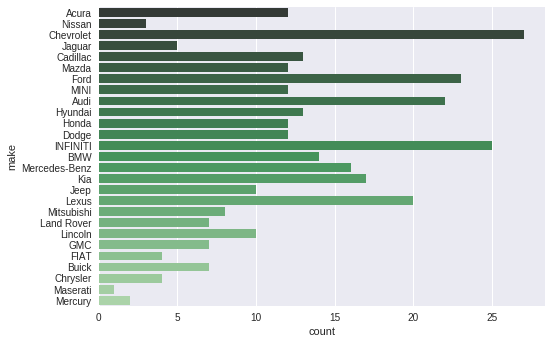

In [12]:
METADATA_CSV.index = METADATA_CSV['id']
train_metadata_csv = METADATA_CSV.loc[TRAIN_MASKS_CSV['id'].unique(),:]
import seaborn as sns
sns.countplot(y="make", data=train_metadata_csv, palette="Greens_d")

# Cars present in test set

In [13]:
test_dataset_ids = list(set(METADATA_CSV['id']) - set(TRAIN_MASKS_CSV['id']))
len(test_dataset_ids), len(METADATA_CSV['id'])


(6254, 6572)

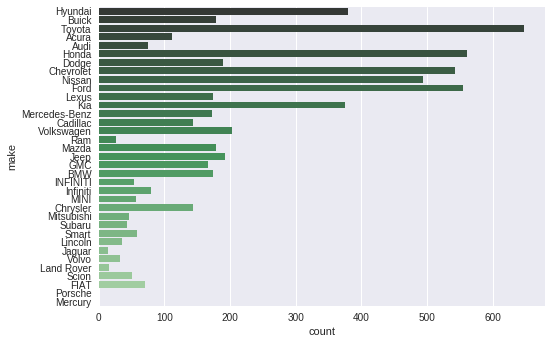

In [14]:
test_metadata_csv = METADATA_CSV.loc[test_dataset_ids,:]
sns.countplot(y="make", data=test_metadata_csv, palette="Greens_d")

# Unet

(1280, 1918, 3)
(1280, 1918)
(1280, 1918)


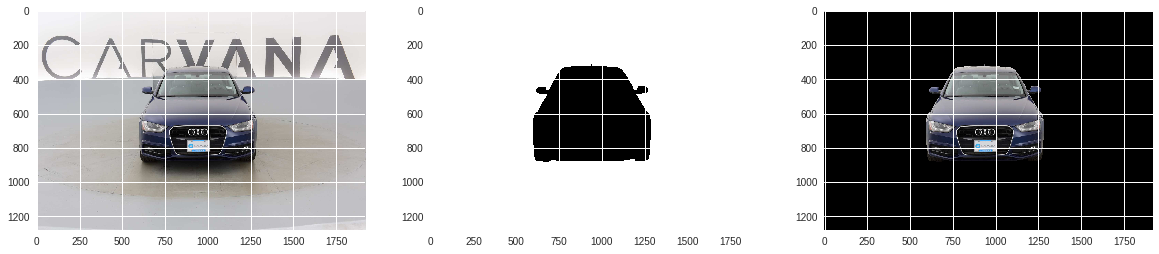

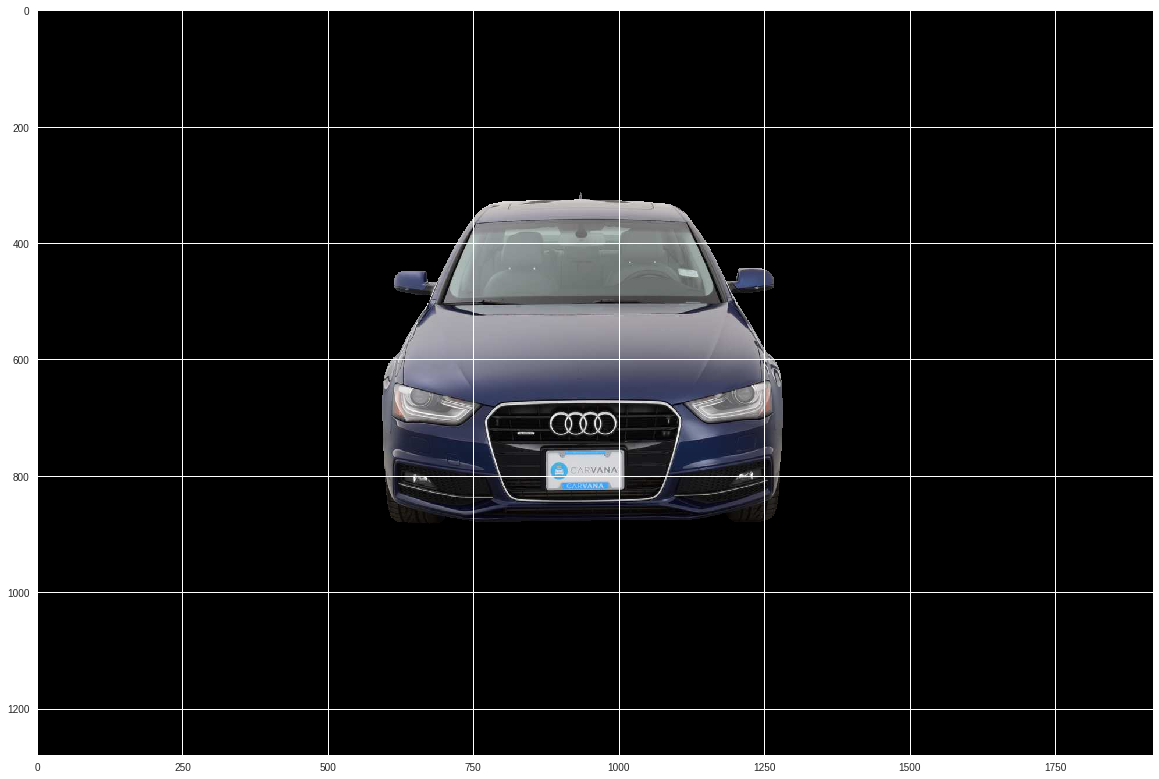

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
img = get_image_data("0cdf5b5d0ce1_01", "Train")
print(img.shape)
plt.imshow(img)

plt.subplot(1, 3, 2)
mask = get_image_data("0cdf5b5d0ce1_01", "Train_mask")
print(mask.shape)
plt.imshow(mask)

plt.subplot(1, 3, 3)
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

# print(masked)
plt.figure(figsize=(20,20))
plt.imshow(masked)